In [1]:
import warnings
warnings.filterwarnings('ignore',category=FutureWarning)
warnings.filterwarnings('ignore',category=DeprecationWarning)
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from pandas.plotting import autocorrelation_plot
import calendar

In [2]:
df = pd.read_csv("../../data/loureiro_45houses.csv")
df.Time = pd.to_datetime(df.Time)
df

,Time,Energy_1,Energy_2,Energy_9,Energy_11,Energy_15,Energy_16,Energy_17,Energy_29,Energy_30,...,Energy_139,Energy_142,Energy_146,Energy_148,Energy_151,Energy_159,Energy_160,Energy_161,Energy_164,Energy_172
0,2022-05-05 12:00:00,0.068,0.018,0.024,0.114,0.164,0.072,0.055,0.011,0.006,...,0.083,0.084,0.068,0.060,0.042,0.055,0.069,0.010,0.004,0.008
1,2022-05-05 12:15:00,0.070,0.018,0.024,0.190,0.135,0.058,0.060,0.002,0.006,...,0.053,0.004,0.048,0.078,0.053,0.055,0.063,0.010,0.003,0.056
2,2022-05-05 12:30:00,0.122,0.018,0.024,0.180,0.121,0.011,0.096,0.010,0.006,...,0.035,0.004,0.062,0.061,0.057,0.055,0.049,0.010,0.004,0.033
3,2022-05-05 12:45:00,0.132,0.018,0.024,0.167,0.138,0.010,0.064,0.004,0.006,...,0.082,0.004,0.056,0.125,0.034,0.055,0.097,0.010,0.004,0.062
4,2022-05-05 13:00:00,0.125,0.018,0.024,0.133,0.104,0.011,0.072,0.002,0.006,...,0.076,0.004,0.034,0.070,0.038,0.055,0.075,0.010,0.004,0.024
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
38011,2023-06-05 10:45:00,0.094,0.032,0.074,0.203,0.108,0.002,0.124,0.012,0.013,...,0.063,0.004,0.063,0.014,0.042,0.168,0.397,0.019,0.003,0.028
38012,2023-06-05 11:00:00,0.094,0.032,0.074,0.203,0.108,0.002,0.124,0.012,0.013,...,0.063,0.004,0.063,0.014,0.042,0.168,0.397,0.019,0.003,0.028
38013,2023-06-05 11:15:00,0.094,0.032,0.074,0.203,0.108,0.002,0.124,0.012,0.013,...,0.063,0.004,0.063,0.014,0.042,0.168,0.397,0.019,0.003,0.028
38014,2023-06-05 11:30:00,0.094,0.032,0.074,0.203,0.108,0.002,0.124,0.012,0.013,...,0.063,0.004,0.063,0.014,0.042,0.168,0.397,0.019,0.003,0.028


In [3]:
df_total = pd.DataFrame(df.sum(axis=1))
df_total.columns = ['Energy']
df_total

,Energy
0,3.231
1,3.043
2,2.959
3,3.067
4,2.987
...,...
38011,4.150
38012,4.149
38013,4.150
38014,4.179


In [4]:
df_location = pd.read_csv("../../data/loureiro_45houses_location.csv")
df_location

,Time,Energy,Location
0,2022-05-05 12:00:00,0.068,Energy_1
1,2022-05-05 12:15:00,0.070,Energy_1
2,2022-05-05 12:30:00,0.122,Energy_1
3,2022-05-05 12:45:00,0.132,Energy_1
4,2022-05-05 13:00:00,0.125,Energy_1
...,...,...,...
1710715,2023-06-05 10:45:00,0.028,Energy_172
1710716,2023-06-05 11:00:00,0.028,Energy_172
1710717,2023-06-05 11:15:00,0.028,Energy_172
1710718,2023-06-05 11:30:00,0.028,Energy_172


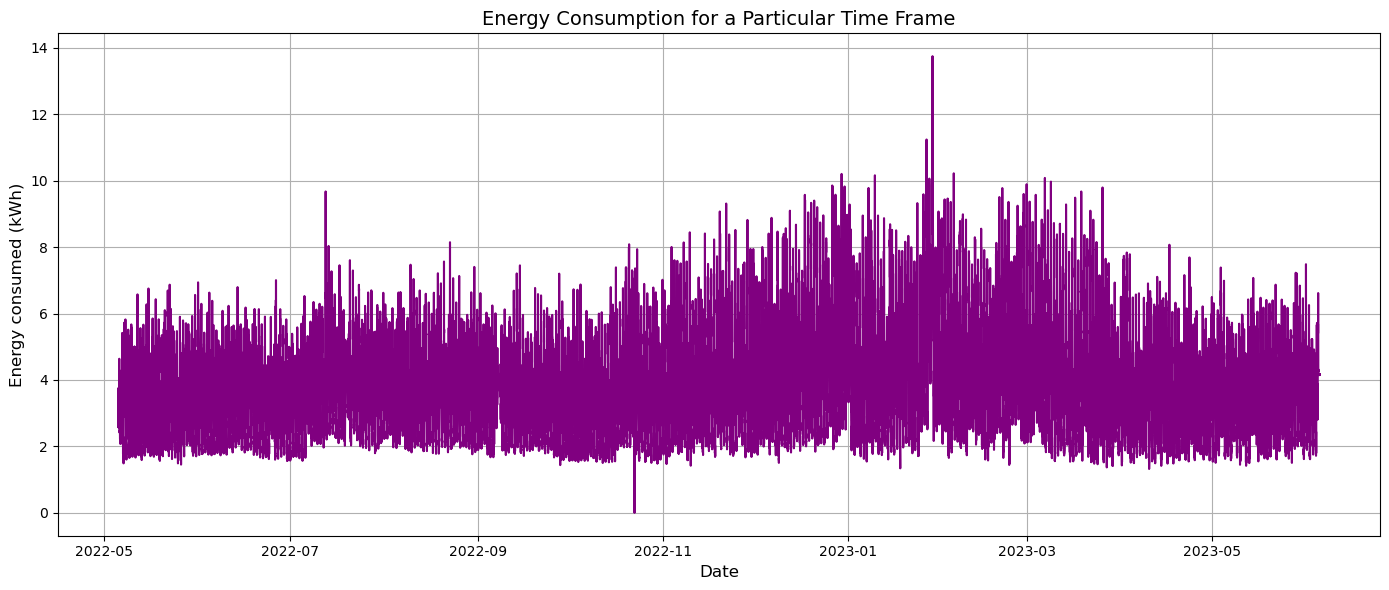

In [5]:
plt.figure(figsize=(14,6))
plt.plot(df["Time"], df_total, color='purple')
plt.ylabel('Energy consumed (kWh)', fontsize=12)
plt.xlabel('Date', fontsize=12)
plt.title('Energy Consumption for a Particular Time Frame', fontsize=14)
plt.tight_layout()
plt.grid(True)
plt.show()

<Axes: xlabel='Lag', ylabel='Autocorrelation'>

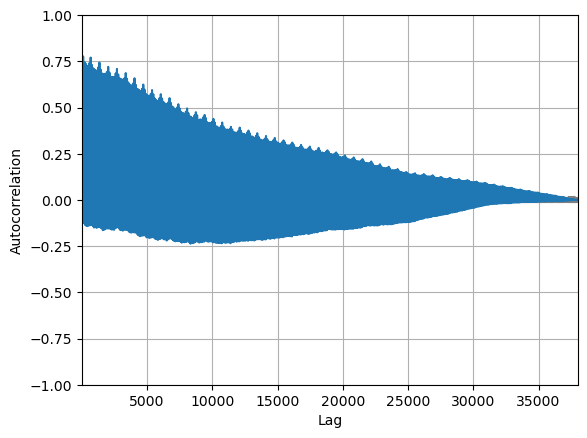

In [6]:
autocorrelation_plot(df_total)

## Visualize by day of week

### Loureiro Dataset

In [5]:
df_location

,Time,Energy,Location
0,2022-05-05 12:00:00,0.068,Energy_1
1,2022-05-05 12:15:00,0.070,Energy_1
2,2022-05-05 12:30:00,0.122,Energy_1
3,2022-05-05 12:45:00,0.132,Energy_1
4,2022-05-05 13:00:00,0.125,Energy_1
...,...,...,...
1710715,2023-06-05 10:45:00,0.028,Energy_172
1710716,2023-06-05 11:00:00,0.028,Energy_172
1710717,2023-06-05 11:15:00,0.028,Energy_172
1710718,2023-06-05 11:30:00,0.028,Energy_172


In [6]:
df_location.isna().any()

Time        False
Energy      False
Location    False
dtype: bool

In [7]:
df_location['Time'] = pd.to_datetime(df_location['Time'])
df_location['DayOfWeek'] = df_location['Time'].dt.dayofweek
df_location['Year'] = df_location['Time'].dt.year
df_location['Hour'] = df_location['Time'].dt.hour
df_location['Month'] = df_location['Time'].dt.month
df_location

,Time,Energy,Location,DayOfWeek,Year,Hour,Month
0,2022-05-05 12:00:00,0.068,Energy_1,3,2022,12,5
1,2022-05-05 12:15:00,0.070,Energy_1,3,2022,12,5
2,2022-05-05 12:30:00,0.122,Energy_1,3,2022,12,5
3,2022-05-05 12:45:00,0.132,Energy_1,3,2022,12,5
4,2022-05-05 13:00:00,0.125,Energy_1,3,2022,13,5
...,...,...,...,...,...,...,...
1710715,2023-06-05 10:45:00,0.028,Energy_172,0,2023,10,6
1710716,2023-06-05 11:00:00,0.028,Energy_172,0,2023,11,6
1710717,2023-06-05 11:15:00,0.028,Energy_172,0,2023,11,6
1710718,2023-06-05 11:30:00,0.028,Energy_172,0,2023,11,6


In [8]:
df_weekly = df_location.groupby(['DayOfWeek']).mean()
df_weekly.drop(['Hour', 'Month', 'Year'], inplace=True, axis=1)
df_weekly

,Energy
DayOfWeek,
0,0.084188
1,0.081293
2,0.083081
3,0.081577
4,0.082189
5,0.088662
6,0.089368


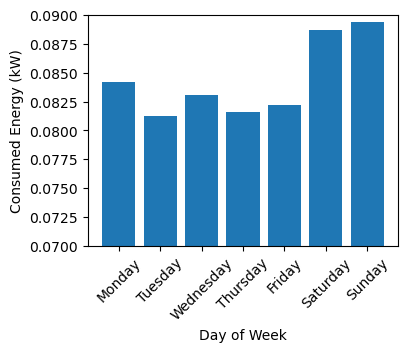

In [34]:
plt.figure(figsize=(4,3))
plt.bar(list(calendar.day_name), df_weekly['Energy'])
plt.xlabel("Day of Week")
plt.ylabel("Consumed Energy (kW)")
#plt.title("Weekly averaged energy consumption - Loureiro")
plt.ylim(0.07,0.090)
plt.xticks(rotation=45)
plt.savefig("../../images/weekly/weekly_consumption_loureiro.png")
plt.show()

In [10]:
df_hourly = df_location.groupby(['Hour']).mean()
df_hourly.drop(['DayOfWeek', 'Month', 'Year'], inplace=True, axis=1)
df_hourly

,Energy
Hour,
0,0.073371
1,0.061709
2,0.054567
3,0.049729
4,0.049070
5,0.047419
6,0.055539
7,0.075375
8,0.080972


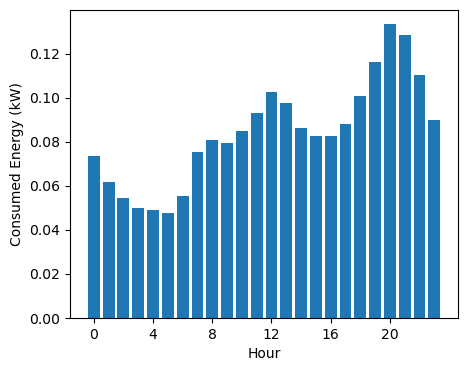

In [37]:
plt.figure(figsize=(5,4))
plt.bar(range(len(df_hourly)), df_hourly['Energy'])
plt.xlabel("Hour")
plt.ylabel("Consumed Energy (kW)")
#plt.title("Hourly averaged energy consumption - Loureiro")
plt.xticks(list([0,4,8,12,16,20]))
plt.savefig("../../images/hourly/hourly_consumption_loureiro.png")
plt.show()

In [12]:
df_monthly = df_location.groupby(['Month', 'Year']).sum()
df_monthly.drop(['DayOfWeek', 'Hour'], inplace=True, axis=1)
df_monthly = df_monthly.sort_values(by=['Year', 'Month'])
df_monthly

,,Energy
Month,Year,
5,2022,8363.073500
6,2022,9637.747500
7,2022,11166.627500
8,2022,10703.129000
9,2022,9733.632487
10,2022,10305.872513
11,2022,11362.114500
12,2022,13276.392500
1,2023,13666.787500


In [13]:
df_monthly.shape

(14, 1)

In [14]:
from datetime import datetime
data = list(df_monthly.index)
formatted_months = [datetime(year, month, 1).strftime("%b %Y") for month, year in data]
formatted_months

['May 2022',
 'Jun 2022',
 'Jul 2022',
 'Aug 2022',
 'Sep 2022',
 'Oct 2022',
 'Nov 2022',
 'Dec 2022',
 'Jan 2023',
 'Feb 2023',
 'Mar 2023',
 'Apr 2023',
 'May 2023',
 'Jun 2023']

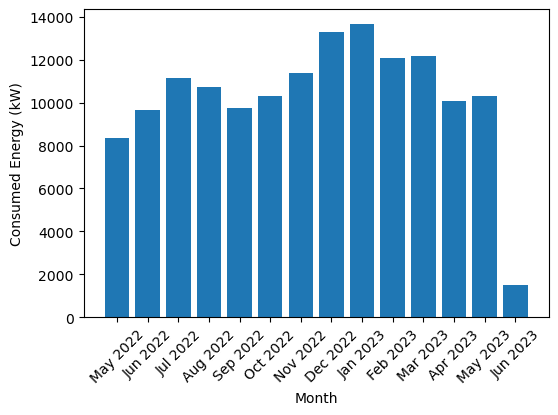

In [22]:
#plt.bar(list(calendar.month_abbr[1:]), df_monthly['Energy'])
plt.figure(figsize=(6,4))
plt.bar(formatted_months, df_monthly['Energy'])
plt.xlabel("Month")
plt.ylabel("Consumed Energy (kW)")
#plt.title("Monthly total energy consumption - Loureiro")
#plt.grid(True)
plt.xticks(rotation=45)
plt.savefig("../../images/monthly/monthly_consumption_loureiro.png")
plt.show()

#### Meteorology comparison

In [21]:
loureiro_meteo = pd.read_csv("../../data/loureiro_weather_45houses.csv")
loureiro_meteo

,Time,Avg_Temp,Avg_Rel_Humidity,Avg_Wind_Direction,Avg_Wind_Speed,Max_Inst_Wind_Speed,Inst_Temp,Quantity_Precip,Max_Inst_Precip,Total_Global_Rad,...,Energy_139,Energy_142,Energy_146,Energy_148,Energy_151,Energy_159,Energy_160,Energy_161,Energy_164,Energy_172
0,2022-05-05 12:00:00,22.70,62.0,305.0,3.80,5.40,24.40,0.0,0.0,526.00,...,0.083,0.084,0.068,0.060,0.042,0.055,0.069,0.010,0.004,0.008
1,2022-05-05 12:15:00,22.55,63.5,311.5,4.05,5.70,24.55,0.0,0.0,523.35,...,0.053,0.004,0.048,0.078,0.053,0.055,0.063,0.010,0.003,0.056
2,2022-05-05 12:30:00,22.10,64.0,311.0,4.10,6.00,24.80,0.0,0.0,520.00,...,0.035,0.004,0.062,0.061,0.057,0.055,0.049,0.010,0.004,0.033
3,2022-05-05 12:45:00,21.95,62.5,300.0,4.45,6.05,24.90,0.0,0.0,514.40,...,0.082,0.004,0.056,0.125,0.034,0.055,0.097,0.010,0.004,0.062
4,2022-05-05 13:00:00,22.20,62.0,314.0,4.00,5.20,24.90,0.0,0.0,507.00,...,0.076,0.004,0.034,0.070,0.038,0.055,0.075,0.010,0.004,0.024
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
38011,2023-06-05 10:45:00,19.80,78.0,319.0,2.20,3.30,23.30,0.0,0.0,443.55,...,0.063,0.004,0.063,0.014,0.042,0.168,0.397,0.019,0.003,0.028
38012,2023-06-05 11:00:00,20.50,76.0,351.0,2.70,4.10,23.90,0.0,0.0,506.50,...,0.063,0.004,0.063,0.014,0.042,0.168,0.397,0.019,0.003,0.028
38013,2023-06-05 11:15:00,21.00,74.0,343.0,2.50,4.15,24.30,0.0,0.0,516.75,...,0.063,0.004,0.063,0.014,0.042,0.168,0.397,0.019,0.003,0.028
38014,2023-06-05 11:30:00,20.80,76.0,334.0,2.80,5.00,24.50,0.0,0.0,518.00,...,0.063,0.004,0.063,0.014,0.042,0.168,0.397,0.019,0.003,0.028


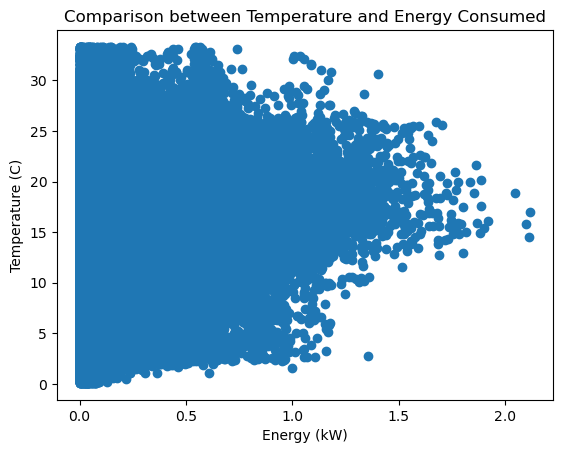

In [19]:
plt.scatter(loureiro_meteo['Energy'], loureiro_meteo['Temp_Med'])
plt.xlabel('Energy (kW)') 
plt.ylabel('Temperature (C)')
plt.title('Comparison between Temperature and Energy Consumed')
plt.show()

### One house only

In [20]:
df_house = df[["Time", "Energy_1"]]
df_house

,Time,Energy_1
0,2022-05-05 12:00:00,0.068
1,2022-05-05 12:15:00,0.070
2,2022-05-05 12:30:00,0.122
3,2022-05-05 12:45:00,0.132
4,2022-05-05 13:00:00,0.125
...,...,...
38011,2023-06-05 10:45:00,0.094
38012,2023-06-05 11:00:00,0.094
38013,2023-06-05 11:15:00,0.094
38014,2023-06-05 11:30:00,0.094


In [ ]:
plt.scatter(df_house['Energy_1'], loureiro_meteo['Temp_Med'][:38019])
plt.xlabel('Energy (kW)') 
plt.ylabel('Temperature (C)')
plt.title('Comparison between Temperature and Energy Consumed')
plt.show()

In [ ]:
import sys
sys.path.append('..')
from scripts.function_utils import correct_wind_direction
loureiro_meteo = correct_wind_direction(loureiro_meteo)
loureiro_meteo.drop("Rumo_Vento_Med", axis=1, inplace=True)
loureiro_meteo

In [ ]:
plt.scatter(df_house['Energy_1'], loureiro_meteo['Temp_Med'][:38019])
plt.xlabel('Energy (kW)') 
plt.ylabel('Temperature (C)')
plt.title('Comparison between Temperature and Energy Consumed')
plt.show()

In [ ]:
plt.scatter(df_house['Energy_1'], loureiro_meteo['Rad_Total'][:38019])
plt.xlabel('Energy (kW)') 
plt.ylabel('Rad_Total')
plt.title('Comparison between Radiation and Energy Consumed')
plt.show()

In [ ]:
plt.scatter(df_house['Energy_1'], loureiro_meteo['Precip'][:38019])
plt.xlabel('Energy (kW)') 
plt.ylabel('Precipitation')
plt.title('Comparison between Temperature and Energy Consumed')
plt.show()

In [ ]:
plt.scatter(df_house['Energy_1'], loureiro_meteo['Intensidade_Vento_Med'][:38019])
plt.xlabel('Energy (kW)') 
plt.ylabel('Intensidade Vento')
plt.title('Comparison between Temperature and Energy Consumed')
plt.show()

In [ ]:
plt.scatter(df_house['Energy_1'], loureiro_meteo['Rumo_Vento_Corrected'][:38019])
plt.xlabel('Energy (kW)') 
plt.ylabel('Rumo Vento')
plt.title('Comparison between Temperature and Energy Consumed')
plt.show()